In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path =r"C:\Users\sushm\Documents\Prodigy internship\synthetic_traffic_accidents_data.xlsx"
data = pd.read_excel(file_path)
print(data.head())

   Accident_ID       Date      Time Weather Road_Conditions  Severity  \
0            1 2023-01-10  23:00:00    Snow           Snowy    Severe   
1            2 2023-02-07  21:00:00   Clear             Icy  Moderate   
2            3 2023-01-07  12:00:00    Hail           Snowy    Severe   
3            4 2023-02-09  05:00:00    Snow             Dry    Severe   
4            5 2023-01-10  10:00:00     Fog           Snowy    Severe   

    Latitude   Longitude  
0  36.996321 -110.039284  
1  41.605714  -94.698259  
2  39.855952  -80.463329  
3  38.789268  -86.514330  
4  35.248149  -83.317871  


In [2]:
# Analyze and visualize accident hotspots and contributing factors
def analyze_accidents(data):
    # Plot the distribution of accidents by weather conditions
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='Weather')
    plt.title('Distribution of Accidents by Weather Conditions')
    plt.xlabel('Weather')
    plt.ylabel('Accident Count')
    plt.show()

    # Plot the distribution of accidents by road conditions
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='Road_Conditions')
    plt.title('Distribution of Accidents by Road Conditions')
    plt.xlabel('Road Conditions')
    plt.ylabel('Accident Count')
    plt.show()

    # Plot the distribution of accidents by severity
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='Severity')
    plt.title('Distribution of Accidents by Severity')
    plt.xlabel('Severity')
    plt.ylabel('Accident Count')
    plt.show()

    # Plot the distribution of accidents by time of day
    data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='Hour')
    plt.title('Distribution of Accidents by Time of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Accident Count')
    plt.show()

    # Visualize accident hotspots
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Longitude'], data['Latitude'], c='red', alpha=0.5)
    plt.title('Accident Hotspots')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Preprocess the data for machine learning
def preprocess_data(data):
    # Encode categorical variables
    label_encoders = {}
    for column in ['Weather', 'Road_Conditions', 'Severity']:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

    # Define features and target variable
    X = data[['Weather', 'Road_Conditions', 'Hour', 'Latitude', 'Longitude']]
    y = data['Severity']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, label_encoders
# Train and evaluate multiple models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier()
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1 Score': f1_score(y_test, y_pred, average='weighted')
        }
    
    return results

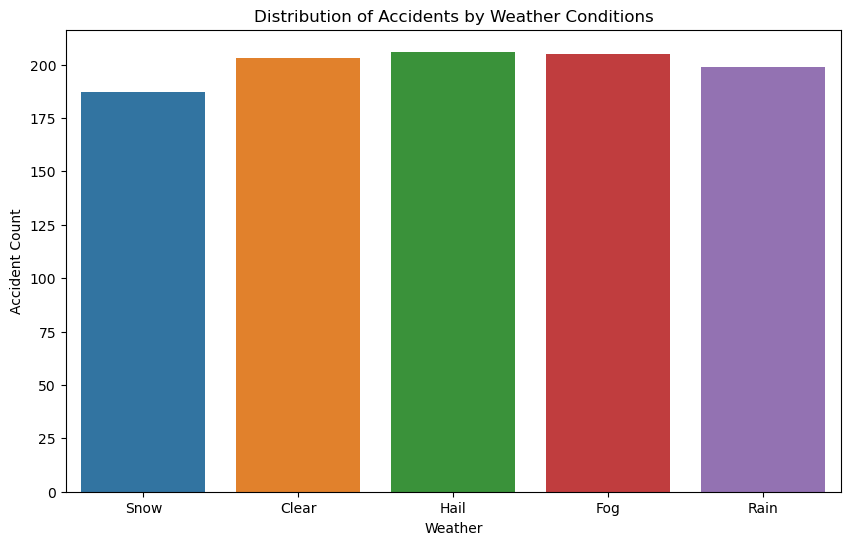

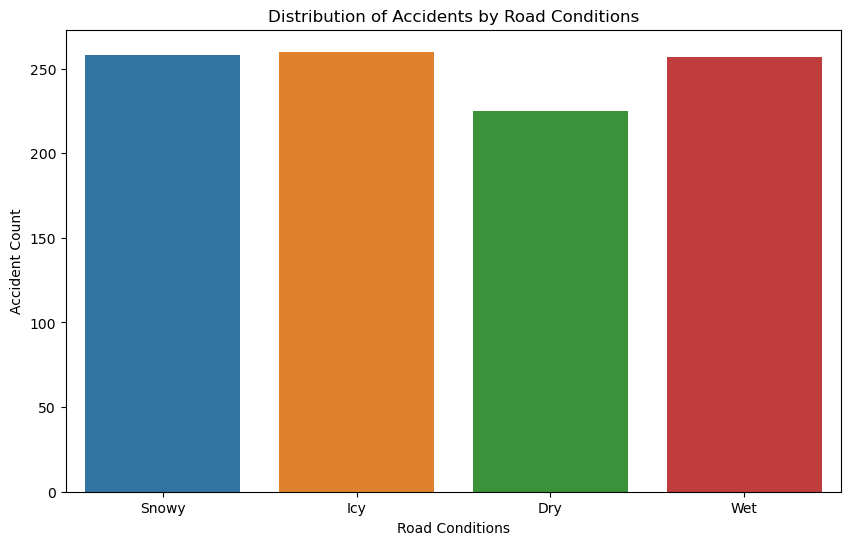

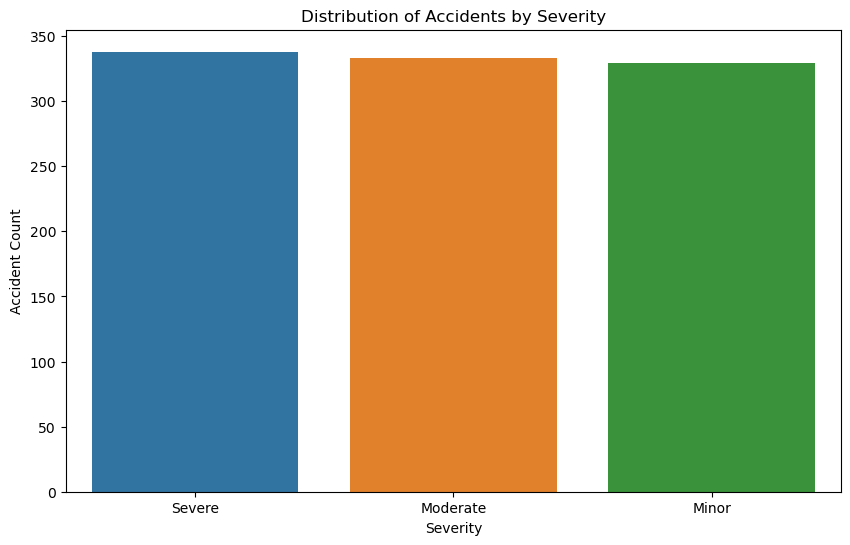

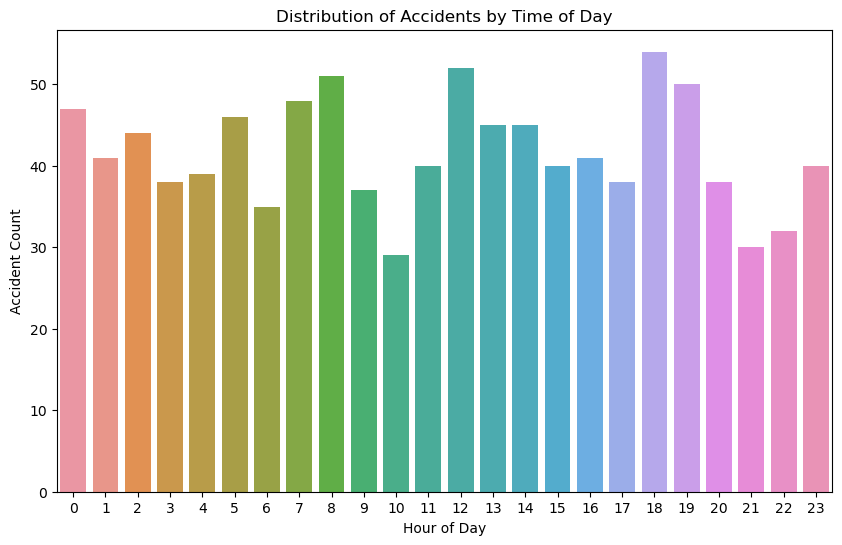

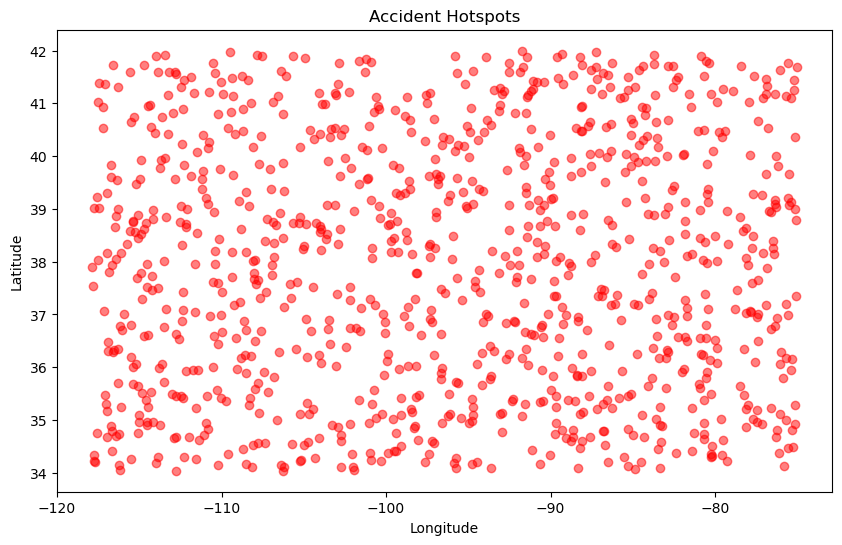

In [3]:
# Run the analysis and machine learning models
analyze_accidents(data)
X_train, X_test, y_train, y_test, label_encoders = preprocess_data(data)
results = train_evaluate_models(X_train, X_test, y_train, y_test)

In [4]:
# Print the evaluation results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("\n")

Model: Logistic Regression
Accuracy: 0.3550
Precision: 0.3758
Recall: 0.3550
F1 Score: 0.3292


Model: Decision Tree
Accuracy: 0.2650
Precision: 0.2642
Recall: 0.2650
F1 Score: 0.2625


Model: Random Forest
Accuracy: 0.3200
Precision: 0.3191
Recall: 0.3200
F1 Score: 0.3194


Model: Gradient Boosting
Accuracy: 0.3050
Precision: 0.3048
Recall: 0.3050
F1 Score: 0.3047




In [ ]:
Based on the metrics obtained:

Random Forest appears to be the best model overall for this dataset due to its competitive performance across all metrics.

 